In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dt = pd.read_csv("C:/Users/USER/OneDrive/Desktop/ABCD/Salary_dataset.csv")
dt.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [5]:
dt.shape

(30, 3)

In [7]:
dt.ndim

2

In [9]:
dt.tail()

,Unnamed: 0,YearsExperience,Salary
25,25,9.1,105583.0
26,26,9.6,116970.0
27,27,9.7,112636.0
28,28,10.4,122392.0
29,29,10.6,121873.0


In [11]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [13]:
dt.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [15]:
dt.isnull().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

In [17]:
dt.isnull().any()

Unnamed: 0         False
YearsExperience    False
Salary             False
dtype: bool

In [19]:
dt.duplicated().sum()

0

In [21]:
dt.columns

Index(['Unnamed: 0', 'YearsExperience', 'Salary'], dtype='object')

[Text(0.5, 1.0, 'Correlation Matrix')]

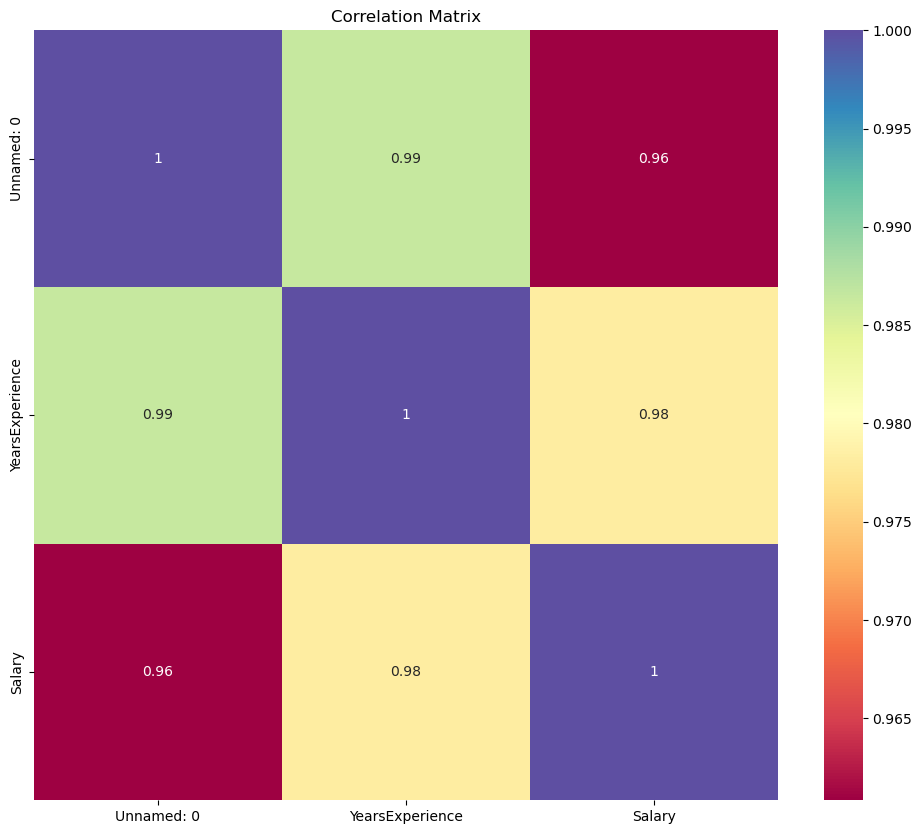

In [23]:
corr = dt.corr() 
plt.figure(figsize=(12,10))
sns.heatmap(data=corr, annot=True, cmap='Spectral').set(title="Correlation Matrix")

In [25]:
dt.sample(3)

,Unnamed: 0,YearsExperience,Salary
27,27,9.7,112636.0
22,22,8.0,101303.0
14,14,4.6,61112.0


In [35]:
y = dt['Salary']  # Replace 'Salary' with the actual column name
print(y.shape)
print()
print(y.head())


(30,)

0    39344.0
1    46206.0
2    37732.0
3    43526.0
4    39892.0
Name: Salary, dtype: float64


In [37]:
x=dt.drop(columns=['Salary'])

In [39]:
x.head()

,Unnamed: 0,YearsExperience
0,0,1.2
1,1,1.4
2,2,1.6
3,3,2.1
4,4,2.3


In [41]:
print(x.shape)
print(y.shape)

(30, 2)
(30,)


In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,  train_size=0.7, random_state=1)

In [45]:
print(x.shape)
print(y.shape)
print()
print(x_train.shape)
print(y_train.shape)
print()
print(x_test.shape)
print(y_test.shape)

(30, 2)
(30,)

(21, 2)
(21,)

(9, 2)
(9,)


In [47]:
from sklearn.linear_model import LinearRegression

In [49]:
model = LinearRegression()

In [51]:
model.fit(x_train,y_train)

LinearRegression()

In [53]:
predict = model.predict(x_test)

In [163]:
predict[:4]

array([69372.39039057, 88861.83042076, 61810.4329395 , 76083.44610832])

In [165]:
print("Accuracy of training dataset:", model.score(x_train,y_train))
print("Accuracy of test dataset:", model.score(x_test,y_test))

Accuracy of training dataset: 0.9694345711178688
Accuracy of test dataset: 0.8617259934844743


In [167]:
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)

In [169]:
test = pd.DataFrame({
    'Y test':y_test,
    'Y test predicted':y_pred_test
})

train = pd.DataFrame({
    'Y train':y_train,
    'Y train predicted':y_pred_train
})

In [171]:
test.sample(4)

,Y test,Y test predicted
14,61112.0,63097.887186
21,98274.0,88861.830421
19,93941.0,76083.446108
26,116970.0,115498.878682


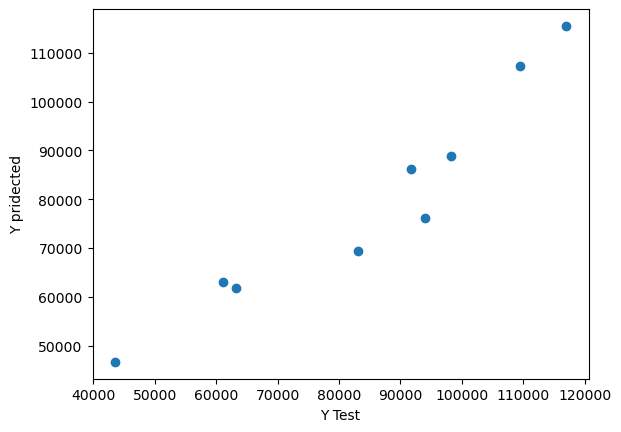

In [173]:
import matplotlib.pyplot as plt 
plt.scatter(y_test,predict)
plt.xlabel('Y Test')
plt.ylabel('Y pridected')
plt.show()

In [175]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [177]:
from math import sqrt

print('MAE = ', mean_absolute_error(y_test,predict))

MAE =  6291.723770968434


In [179]:
print('MSE =', mean_squared_error(y_test,predict))

MSE = 72022809.99529584


In [181]:
print('RMSE = ', sqrt(mean_squared_error(y_test,predict)))

RMSE =  8486.62535966422


In [183]:
dt.corr()

,Unnamed: 0,YearsExperience,Salary
Unnamed: 0,1.000000,0.986460,0.960826
YearsExperience,0.986460,1.000000,0.978242
Salary,0.960826,0.978242,1.000000


In [185]:
dt.head(3)

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0


In [203]:
user = pd.DataFrame([[31.926272,11.109461,37.268959,2.664034]]) # [34.4972,12.6556,39.5776,4.0826]

In [207]:
model = LinearRegression()
model.fit(X, y)
user = pd.DataFrame([[31.926272]], columns=['YearsExperience'])
result = model.predict(user)
print(f"Predicted Salary: ${result[0]:,.2f}")

Predicted Salary: $326,550.27
